# Project 1: AI-Powered Task Management System 
# Problem Statement: 
# Design and develop an intelligent task management system that leverages NLP and ML techniques to 
# automatically classify, prioritize, and assign tasks to users based on their behavior, deadlines, and workloads. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   task_id        200 non-null    object
 1   description    200 non-null    object
 2   assigned_to    200 non-null    object
 3   priority       200 non-null    object
 4   deadline       200 non-null    object
 5   status         200 non-null    object
 6   task_type      200 non-null    object
 7   workload       200 non-null    int64 
 8   deadline_days  200 non-null    int64 
dtypes: int64(2), object(7)
memory usage: 14.2+ KB
None


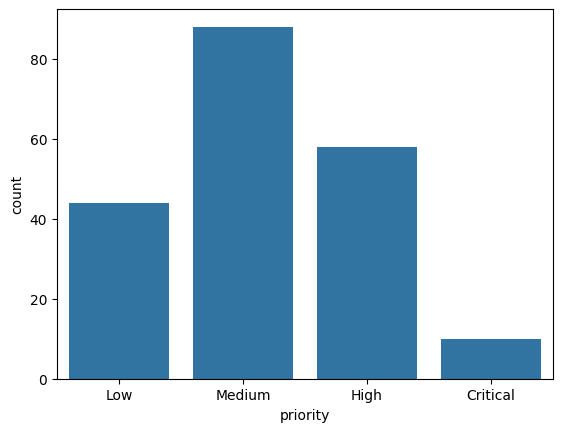

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("dataset/task.csv")
print(df.info())
sns.countplot(x="priority", data=df)
plt.show()